In [113]:
import numpy as np
import pandas as pd
import datetime as dt

# Introduction
FX Telecom is a fast growing Internet & Technology unicorn that need to adapt quickly to it’s global scale from Vietnam.

The Marketing team has data of more than 1 million registered customer and plan to serve them better.

The Analytics & Insights team base on RFM model to analyze to define who will drive the most value for the organization in the project “Customer 360”.

## Tasks
* **RFM Analysis**
* **Business Intelligence report of customer growth rate**

From RFM model to segmentation.

Base on registered, cancelled date to visualize and keep tracking the growth rate.

## 1. Data Overview

In [114]:
df = pd.read_csv('/kaggle/input/rfm-analytics/RFM.csv')

/tmp/ipykernel_32/1939516424.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/rfm-analytics/RFM.csv')


In [115]:
df["created_date"] = pd.to_datetime(df["created_date"]).dt.floor('D')

df["stopped_date"] = pd.to_datetime(df["stopped_date"]).dt.floor('D')

df["purchased_date"] = pd.to_datetime(df["purchased_date"]).dt.floor('D')

In [116]:
df.tail(20)

,ID,created_date,stopped_date,purchased_date,GMV,LocationName
8783700,1048574,2019-01-07,NaT,NaT,NaN,Dong Nai
8783701,1048574,2019-01-07,NaT,NaT,NaN,Dong Nai
8783702,1048574,2019-01-07,NaT,NaT,NaN,Dong Nai
8783703,1048575,2019-01-07,NaT,NaT,NaN,Ho Chi Minh
8783704,1048575,2019-01-07,NaT,NaT,NaN,Ho Chi Minh
8783705,1048575,2019-01-07,NaT,NaT,NaN,Ho Chi Minh
8783706,1048575,2019-01-07,NaT,NaT,NaN,Ho Chi Minh
8783707,1048575,2019-01-07,NaT,NaT,NaN,Ho Chi Minh
8783708,1048575,2019-01-07,NaT,NaT,NaN,Ho Chi Minh
8783709,1048575,2019-01-07,NaT,NaT,NaN,Ho Chi Minh


In [117]:
summary_stats = df.describe()
print(summary_stats)

                 ID           GMV
count  8.783720e+06  1.070380e+06
mean   5.374653e+05  8.724364e+04
std    3.007204e+05  2.172781e+04
min    1.000000e+00  0.000000e+00
25%    2.906188e+05  7.500000e+04
50%    5.422930e+05  8.500000e+04
75%    7.966590e+05  9.500000e+04
max    1.048575e+06  2.750000e+05


In [118]:
counts_in_data= df.isna().sum()
print(counts_in_data)

ID                      0
created_date            0
stopped_date      8783507
purchased_date    7713340
GMV               7713340
LocationName           50
dtype: int64


In [119]:
copied_df = df.copy()
copied_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8783720 entries, 0 to 8783719
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   ID              int64         
 1   created_date    datetime64[ns]
 2   stopped_date    datetime64[ns]
 3   purchased_date  datetime64[ns]
 4   GMV             float64       
 5   LocationName    object        
dtypes: datetime64[ns](3), float64(1), int64(1), object(1)
memory usage: 402.1+ MB


In [120]:
copied_df = copied_df[copied_df['stopped_date'].isnull()]

In [121]:
copied_df = copied_df[copied_df['purchased_date'].notnull()]
copied_df.head(10)

,ID,created_date,stopped_date,purchased_date,GMV,LocationName
615882,71739,2015-05-25,NaT,2022-07-01,105000.0,Kon Tum
617764,72014,2015-05-26,NaT,2022-07-01,159091.0,Dak Lak
617765,72014,2015-05-26,NaT,2022-06-01,95000.0,Dak Lak
618041,72052,2015-05-26,NaT,2022-08-01,145000.0,Nam Dinh
622158,72657,2015-05-27,NaT,2022-07-01,200000.0,Lam Dong
635815,74549,2015-06-01,NaT,2022-07-01,125000.0,Ho Chi Minh
635816,74549,2015-06-01,NaT,2022-07-01,125000.0,Ho Chi Minh
635817,74549,2015-06-01,NaT,2022-07-01,125000.0,Ho Chi Minh
635818,74549,2015-06-01,NaT,2022-07-01,125000.0,Ho Chi Minh
635819,74549,2015-06-01,NaT,2022-07-01,125000.0,Ho Chi Minh


In [122]:
counts_in_data= copied_df.isna().sum()
print(counts_in_data)

ID                      0
created_date            0
stopped_date      1070380
purchased_date          0
GMV                     0
LocationName            0
dtype: int64


In [123]:
copied_df.dtypes

ID                         int64
created_date      datetime64[ns]
stopped_date      datetime64[ns]
purchased_date    datetime64[ns]
GMV                      float64
LocationName              object
dtype: object

In [124]:
PRESENT = pd.to_datetime(dt.date(2022,9,1))
print(PRESENT)

2022-09-01 00:00:00


## 2. RFM Raw score & contract age calculation

Contract age help to define exactly frequency. E.g: frequency = 7 but contract_age = 7 means average frequency = 1 per year will be less than a customer with frequency = 3 but contract_age = 1.

In [125]:
RFM_df = pd.DataFrame(columns=['Recency', 'Frequency', 'Monetary', "Contract_age"])
RFM_df['Frequency'] = copied_df.groupby('ID').count()['purchased_date']
RFM_df['Monetary'] = copied_df.groupby('ID').agg({'GMV': lambda money: money.sum()})
RFM_df['Recency'] = copied_df.groupby('ID').agg({'purchased_date': lambda date: (PRESENT - date.max()).days})

In [126]:
RFM_df['Contract_age'] = copied_df.groupby('ID').agg({'created_date': lambda date: round((PRESENT - date.min()).days/365)})

In [127]:
RFM_df.head(20)

,Recency,Frequency,Monetary,Contract_age
ID,,,,
71739,62,1,105000.0,7
72014,62,2,254091.0,7
72052,31,1,145000.0,7
72657,62,1,200000.0,7
74549,62,17,2125000.0,7
74570,62,1,125000.0,7
74604,31,2,155000.0,7
74662,31,1,105000.0,7
74797,62,1,105000.0,7


### "Fixed" Frequency calculation based on contract_age

In [128]:
RFM_df['Frequency'] = (RFM_df['Frequency']/RFM_df['Contract_age']).round(2)

In [129]:
RFM_df.describe()

,Recency,Frequency,Monetary,Contract_age
count,114081.000000,114081.000000,1.140810e+05,114081.000000
mean,61.246947,2.027685,8.185750e+05,4.806988
std,26.121422,1.905237,7.974330e+05,0.926966
min,1.000000,0.140000,0.000000e+00,4.000000
25%,31.000000,0.250000,1.050000e+05,4.000000
50%,62.000000,1.250000,5.250000e+05,5.000000
75%,92.000000,3.400000,1.275000e+06,5.000000
max,92.000000,18.750000,8.554094e+06,7.000000


### Extract Q1, median, Q3 from the summarized table

In [130]:
min_row = RFM_df.describe(include='all').loc['min']
Q1_row = RFM_df.describe(include='all').loc['25%']
mean_row = RFM_df.describe(include='all').loc['mean']
Q2_row = RFM_df.describe(include='all').loc['50%']
Q3_row = RFM_df.describe(include='all').loc['75%']
max_row = RFM_df.describe(include='all').loc['mean']

In [134]:
print(Q3_row[0])
print(Q2_row[0])
print(Q1_row[0])

92.0
62.0
31.0


In [132]:
RFM_Score = RFM_df.copy()

In [133]:
RFM_Score.head(10)

,Recency,Frequency,Monetary,Contract_age
ID,,,,
71739,62,0.14,105000.0,7
72014,62,0.29,254091.0,7
72052,31,0.14,145000.0,7
72657,62,0.14,200000.0,7
74549,62,2.43,2125000.0,7
74570,62,0.14,125000.0,7
74604,31,0.29,155000.0,7
74662,31,0.14,105000.0,7
74797,62,0.14,105000.0,7


### RFM's Quartile calculation

In [135]:
def R_quartile(r):
    if r >= Q3_row[0]:
        return 1
    elif r < Q3_row[0] and r >= Q2_row[0]:
        return 2
    elif r < Q2_row[0] and r > Q1_row[0]:
        return 3
    else:
        return 4
    
def F_quartile(r):
    if r >= Q3_row[1]:
        return 4
    elif r < Q3_row[1] and r >= Q2_row[1]:
        return 3
    elif r < Q2_row[1] and r >= Q1_row[1]:
        return 2
    else:
        return 1
    
def M_quartile(r):
    if r >= Q3_row[2]:
        return 4
    elif r < Q3_row[2] and r >= Q2_row[2]:
        return 3
    elif r < Q2_row[2] and r >= Q1_row[2]:
        return 2
    else:
        return 1

In [136]:
RFM_Score['R_sc'] = RFM_Score['Recency'].apply(R_quartile)
RFM_Score['F_sc'] = RFM_Score['Frequency'].apply(F_quartile)
RFM_Score['M_sc'] = RFM_Score['Monetary'].apply(M_quartile)

### RFM Score

In [137]:
RFM_Score['RFM_Sc'] = RFM_Score['R_sc'] * 100 + RFM_Score['F_sc'] * 10 + RFM_Score['M_sc']

In [138]:
RFM_Score.sample(50)

,Recency,Frequency,Monetary,Contract_age,R_sc,F_sc,M_sc,RFM_Sc
ID,,,,,,,,
889186,62,0.25,105000.0,4,2,2,2,222
827900,31,3.75,1425000.0,4,4,4,4,444
392096,62,2.83,1190000.0,6,2,3,3,233
995226,92,0.25,95000.0,4,1,2,1,121
265354,92,2.83,2125000.0,6,1,3,4,134
228738,92,2.50,1275000.0,6,1,3,4,134
427839,92,0.20,50000.0,5,1,1,1,111
893084,62,3.75,1125000.0,4,2,4,3,243
280626,31,0.83,300000.0,6,4,2,2,422


### Classification bases on RFM Score

In [151]:
def classification(sc):
    if sc >= 443:
        return 'Platinum'
    elif sc < 443 and sc >= 421:
        return 'Gold'
    elif sc < 421 and sc >= 221:
        return 'Silver'
    elif sc < 221 and sc > 141:
        return 'Bronze'
    else:
        return 'Regular'

In [152]:
RFM_Score['Segmentation'] = RFM_Score['RFM_Sc'].apply(classification)

In [153]:
RFM_Score.sample(20)

,Recency,Frequency,Monetary,Contract_age,R_sc,F_sc,M_sc,RFM_Sc,Segmentation
ID,,,,,,,,,
701079,62,0.25,105000.0,4,2,2,2,222,Silver
1029675,92,4.25,1615000.0,4,1,4,4,144,Bronze
490757,31,3.40,1530000.0,5,4,4,4,444,Platinum
736050,62,0.75,255000.0,4,2,2,2,222,Silver
275176,62,2.50,1275000.0,6,2,3,4,234,Silver
504678,31,0.60,225000.0,5,4,2,2,422,Gold
464692,65,3.00,105000.0,5,2,3,2,232,Silver
1035685,92,0.75,285000.0,4,1,2,2,122,Regular
655049,92,0.20,75000.0,5,1,1,1,111,Regular


### Data Overview

To check error or modify the RFM formula

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

In [154]:
RFM_Score['Segmentation'].value_counts()

Silver      31330
Regular     28818
Gold        23137
Bronze      16793
Platinum    14003
Name: Segmentation, dtype: int64

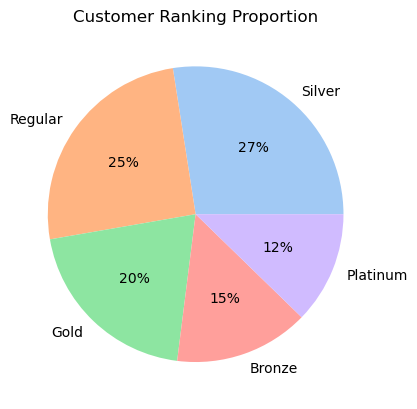

In [155]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]
labels = ["Silver", "Regular", "Gold", "Bronze", "Platinum"]

#create pie chart
plt.pie(RFM_Score['Segmentation'].value_counts(),labels=labels, colors = colors, autopct='%.0f%%')
plt.title("Customer Ranking Proportion")
plt.show()

In [156]:
RFM_Score['Monetary'].sum()

93383850639.0

### Export data to build Dashboard with Tableau/PowerBI

In [190]:
import os  
os.makedirs('/kaggle/working/', exist_ok=True)  
RFM_Score.to_csv('/kaggle/working/RFM_Score.csv')  